In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.model import OrientationModel
from src.utilities import generate_block
from matplotlib import pyplot as plt
import pandas as pd
from src.model.parameters import PARAMETERS

In [11]:
V1_dim = (121, 121)
figure_dim = (25, 25)
orientations = [1, 10]
na = generate_block(
    input_dim=V1_dim,
    figure_dim=figure_dim,
    bg_orientation=orientations[0],
    figure_orientation=orientations[1],
)

In [12]:
# Define the recording sites in each layer
sites = {"V4": {"cen": (7, 7), "bck": (1, 1)}, "FEF": {"cen": (7, 7), "bck": (1, 1)}}

# Add on 40 timesteps with zero activity
initial_recordings = {"cen": [0 for _ in range(40)], "bck": [0 for _ in range(40)]}

# Construct the salience_model
model = OrientationModel(
    parameters=pd.DataFrame.from_dict(PARAMETERS).transpose(),
    channels=12,
    input_dim=V1_dim,
    input_activity=na,
    recording_sites=sites,
    initial_recordings=initial_recordings,
)

In [13]:
# Run 600 10e-3 timesteps
model.simulate(n=600, timestep=10e-3)

{'V4': {'cen': [0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   np.float64(7.79485469947872e-05),
   np.float64(0.0003890443266842685),
   np.float64(0.001164176001346673),
   np.float64(0.0027069682589907947),
   np.float64(0.005388801259558557),
   np.float64(0.00964111642185638),
   np.float64(0.015944337815803577),
   np.float64(0.024812849429375422),
   np.float64(0.03677569211337143),
   np.float64(0.052352984073165354),
   np.float64(0.07202850905399415),
   np.float64(0.09621941801259422),
   np.float64(0.12524449677111468),
   np.float64(0.15929290323220502),
   np.float64(0.19839562592607107),
   np.float64(0.24240214109104893),
   np.float64(0.29096485421741125),
   np.float64(0.3435339097765233),
   np.float64(0.3993647966598768),
   np.float64(0.4575407278193053),
   np.float64(0.5170

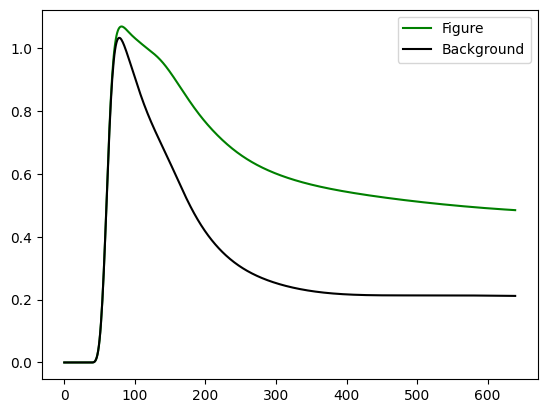

In [14]:
plt.plot(model.recordings["V4"]["cen"], "g", label="Figure")
plt.plot(model.recordings["V4"]["bck"], "k", label="Background")
plt.legend()